Outliers in Age:
Empty DataFrame
Columns: [Age, Salary, Years of Experience]
Index: []

Outliers in Salary:
Empty DataFrame
Columns: [Age, Salary, Years of Experience]
Index: []

Outliers in Years of Experience:
Empty DataFrame
Columns: [Age, Salary, Years of Experience]
Index: []


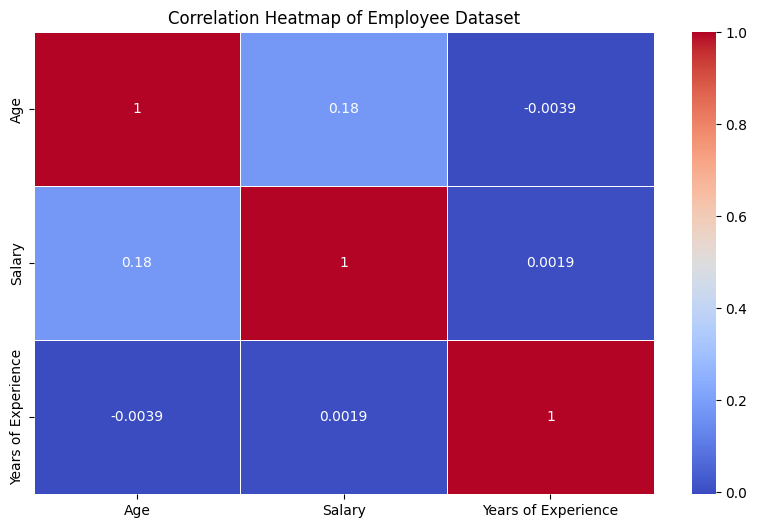

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset
np.random.seed(42)  # for reproducibility

# Generate 100 employees with age, salary, and years of experience
num_employees = 100
age = np.random.randint(20, 65, num_employees)
salary = np.random.randint(30000, 120000, num_employees)
years_experience = np.random.randint(0, 40, num_employees)

# Create a DataFrame
employee_data = pd.DataFrame({
    'Age': age,
    'Salary': salary,
    'Years of Experience': years_experience
})

# Introduce some outliers for demonstration (comment out if not needed)
# employee_data.iloc[0, 0] = 18  # outlier in Age
# employee_data.iloc[1, 1] = 150000  # outlier in Salary
# employee_data.iloc[2, 2] = 60  # outlier in Years of Experience

# Step 2: Outlier detection (using 1.5*IQR method)
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_age = detect_outliers(employee_data, 'Age')
outliers_salary = detect_outliers(employee_data, 'Salary')
outliers_experience = detect_outliers(employee_data, 'Years of Experience')

print("Outliers in Age:")
print(outliers_age)
print("\nOutliers in Salary:")
print(outliers_salary)
print("\nOutliers in Years of Experience:")
print(outliers_experience)

# Step 3: Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(employee_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Employee Dataset')
plt.show()
